In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

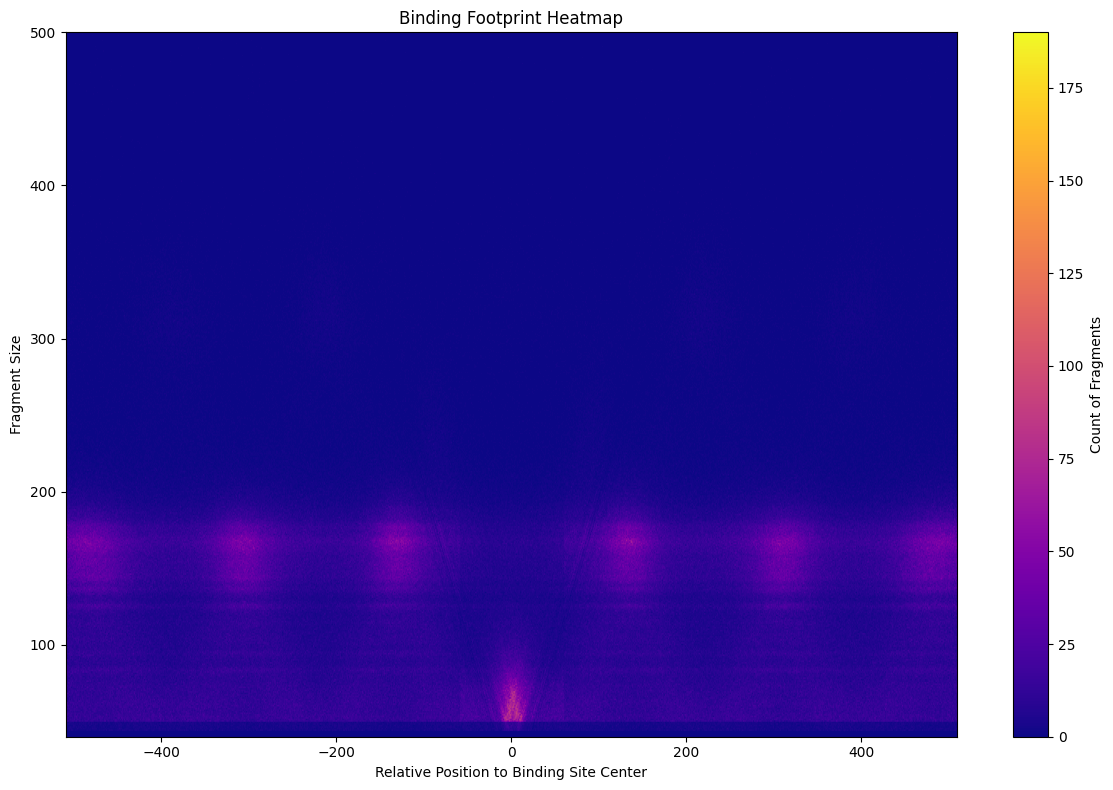

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_bed_data(path_to_bed):
    coordinates = []
    with open(path_to_bed, 'r') as f:
        for entry in f:
            fields = entry.strip().split('\t')
            bs_chr, bs_start, bs_end = fields[1], int(fields[2]), int(fields[3])  # Binding site
            frag_chr, frag_start, frag_end = fields[7], int(fields[8]), int(fields[9])  # Fragment

            midpoint_bs = (bs_start + bs_end) / 2
            midpoint_frag = (frag_start + frag_end) / 2
            rel_distance = midpoint_frag - midpoint_bs
            frag_length = frag_end - frag_start

            coordinates.append((rel_distance, frag_length))

    return pd.DataFrame(coordinates, columns=['RelDist', 'FragLen'])

# Load and process BED file
bed_df = load_bed_data("mapped.bed")

# Aggregate identical (RelDist, FragLen) pairs
density = bed_df.groupby(['RelDist', 'FragLen']).size().reset_index(name='Count')

# Reshape for heatmap visualization
heatmap_matrix = density.pivot(index='FragLen', columns='RelDist', values='Count').fillna(0)

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
img = ax.imshow(
    heatmap_matrix.values,
    cmap='plasma',  # changed colormap
    aspect='auto',
    extent=[
        heatmap_matrix.columns.min(),
        heatmap_matrix.columns.max(),
        heatmap_matrix.index.max(),
        heatmap_matrix.index.min()
    ]
)

plt.colorbar(img, label='Count of Fragments')
ax.set_xlabel('Relative Position to Binding Site Center')
ax.set_ylabel('Fragment Size')
ax.set_title('Binding Footprint Heatmap')
ax.invert_yaxis()  # Longer fragments at top
plt.tight_layout()
plt.show()
